<a href="https://colab.research.google.com/github/lakshmant-thota/ml_zoomcamp/blob/master/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip


--2024-10-27 15:53:08--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  3.29MB/s    in 0.3s    

2024-10-27 15:53:08 (3.29 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [4]:
!unzip bank+marketing.zip
!unzip bank.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [5]:
df = pd.read_csv("bank.csv",sep=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.y

,y
0,no
1,no
2,no
3,no
4,no
...,...
4516,no
4517,no
4518,no
4519,no


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
df.drop(['default','loan'],axis=1,inplace=True)

In [10]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df.shape

(4521, 15)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)

In [14]:
df_full_train.shape[0],df_test.shape[0]

(3616, 905)

In [15]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [16]:
df_train.shape[0],df_test.shape[0],df_val.shape[0]

(2712, 905, 904)

# Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the above_average variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

balance
day
duration
previous

In [17]:
df_train.dtypes

,0
age,int64
job,object
marital,object
education,object
balance,int64
housing,object
contact,object
day,int64
month,object
duration,int64


In [18]:
# prompt: i want the list of columns with int64 or float64

numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_scores = []
for i in numerical_cols:
    auc = roc_auc_score(df_train.y,df_train[i])
    if auc < 0.5:
        auc = roc_auc_score(df_train.y,-df_train[i])
    roc_auc_scores.append((i,auc))



In [20]:
roc_auc_scores.sort(key=lambda x: x[1], reverse=True)

In [21]:
roc_auc_scores

[('duration', 0.810919927965449),
 ('previous', 0.6033398320256265),
 ('pdays', 0.5949284966771672),
 ('balance', 0.5891626780278683),
 ('campaign', 0.5478058945086935),
 ('age', 0.5276577349489755),
 ('day', 0.5137780687728096)]

# Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.69
0.79
0.89
0.99

In [22]:
y_full_train = df_full_train.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
del df_full_train['y']
del df_test['y']
del df_train['y']
del df_val['y']

In [23]:
dicts_train = df_train.to_dict(orient = 'records')

In [24]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [27]:
x_val = dv.transform(df_val.to_dict(orient = 'records'))
y_pred = model.predict_proba(x_val)[:,1]

In [28]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.9123741700578283

In [29]:
dicts_full_train = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_full_train,y_full_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [30]:
roc_auc_score(y_val,model.predict_proba(x_val)[:,1])

0.922427179267509

# Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.265
0.465
0.665
0.865

In [33]:
precisions = []
recalls = []
thresholds = np.linspace(0,1,101)
for t in np.linspace(0,1,101):
  ap= (y_val == 1)
  an= (y_val == 0)
  pp = (y_pred >= t)
  pn = (y_pred < t)
  tp = (ap & pp).sum()
  fp = (an & pp).sum()
  fn = (ap & pn).sum()
  tn = (an & pn).sum()
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  precisions.append(precision)
  recalls.append(recall)



<ipython-input-33-c1e0a7975964>:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
<ipython-input-33-c1e0a7975964>:14: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


In [49]:
# prompt: can you analyze and tell me what the error is in the above code

precisions = []
recalls = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    true_positive = (actual_positive & predicted_positive).sum()
    false_positive = (actual_negative & predicted_positive).sum()
    false_negative = (actual_positive & predicted_negative).sum()
    true_negative = (actual_negative & predicted_negative).sum()

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precisions.append(precision)
    recalls.append(recall)

In [53]:
# prompt: they are all coming out to be zseros

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

!unzip bank+marketing.zip
!unzip bank.zip
df = pd.read_csv("bank.csv",sep=';')
df.head()
df.y
df.columns
df.drop(['default','loan'],axis=1,inplace=True)
df.head()
df.shape
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_full_train.shape[0],df_test.shape[0]
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)
df_train.shape[0],df_test.shape[0],df_val.shape[0]
# # Question 1: ROC AUC feature importance
# ROC AUC could also be used to evaluate feature importance of numerical variables.
#
# Let's do that
#
# For each numerical variable, use it as score and compute AUC with the above_average variable
# Use the training dataset for that
# If your AUC is < 0.5, invert this variable by putting "-" in front
#
# (e.g. -df_train['engine_hp'])
#
# AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.
#
# Which numerical variable (among the following 4) has the highest AUC?
#
# balance
# day
# duration
# previous
df_train.dtypes

numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols.tolist())
roc_auc_scores = []
for i in numerical_cols:
    auc = roc_auc_score(df_train.y == 'yes',df_train[i])
    if auc < 0.5:
        auc = roc_auc_score(df_train.y == 'yes',-df_train[i])
    roc_auc_scores.append((i,auc))


roc_auc_scores.sort(key=lambda x: x[1], reverse=True)
roc_auc_scores
# # Question 2: Training the model
# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
#
# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# What's the AUC of this model on the validation dataset? (round to 3 digits)
#
# 0.69
# 0.79
# 0.89
# 0.99
y_full_train = (df_full_train.y == 'yes').astype(int).values
y_train = (df_train.y == 'yes').astype(int).values
y_val = (df_val.y == 'yes').astype(int).values
y_test = (df_test.y == 'yes').astype(int).values
del df_full_train['y']
del df_test['y']
del df_train['y']
del df_val['y']
dicts_train = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)
x_val = dv.transform(df_val.to_dict(orient = 'records'))
y_pred = model.predict_proba(x_val)[:,1]
roc_auc_score(y_val,y_pred)
dicts_full_train = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_full_train,y_full_train)
roc_auc_score(y_val,model.predict_proba(x_val)[:,1])
# # Question 3: Precision and Recall
# Now let's compute precision and recall for our model.
#
# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them
# At which threshold precision and recall curves intersect?
#
# 0.265
# 0.465
# 0.665
# 0.865
precisions = []
recalls = []
thresholds = np.linspace(0,1,101)
for t in np.linspace(0,1,101):
  ap= (y_val == 1)
  an= (y_val == 0)
  pp = (y_pred >= t)
  pn = (y_pred < t)
  tp = (ap & pp).sum()
  fp = (an & pp).sum()
  fn = (ap & pn).sum()
  tn = (an & pn).sum()
  precision = tp / (tp + fp) if (tp + fp) > 0 else 0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0
  precisions.append(precision)
  recalls.append(recall)



precisions = []
recalls = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    true_positive = (actual_positive & predicted_positive).sum()
    false_positive = (actual_negative & predicted_positive).sum()
    false_negative = (actual_positive & predicted_negative).sum()
    true_negative = (actual_negative & predicted_negative).sum()

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precisions.append(precision)
    recalls.append(recall)

closest_threshold = None
min_diff = float('inf')
for i in range(len(thresholds)):
    diff = abs(precisions[i] - recalls[i])
    if diff < min_diff:
        min_diff = diff
        closest_threshold = thresholds[i]

closest_threshold

--2024-10-27 16:58:44--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.1’

bank+marketing.zip.     [  <=>               ] 999.85K  3.28MB/s    in 0.3s    

2024-10-27 16:58:45 (3.28 MB/s) - ‘bank+marketing.zip.1’ saved [1023843]

Archive:  bank+marketing.zip
replace bank.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


1.0

In [37]:
ap= (y_val == 1)
an= (y_val == 0)
pp = (y_pred >= 0.5)
pn = (y_pred < 0.5)
tp = (ap & pp).sum()
fp = (an & pp).sum()
fn = (ap & pn).sum()
tn = (an & pn).sum()
precision = tp / (tp + fp)
recall = tp / (tp + fn)


<ipython-input-37-3184013d65a5>:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
<ipython-input-37-3184013d65a5>:10: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


(nan, nan)

In [47]:
y_val_d = dv.transform(df_val.to_dict(orient = 'records'))

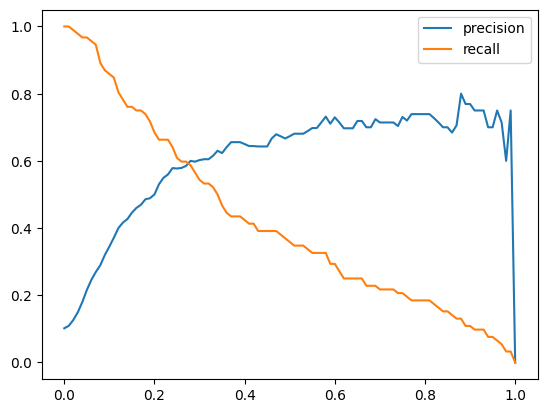

In [56]:
plt.plot(thresholds,precisions,label='precision')
plt.plot(thresholds,recalls,label='recall')
plt.legend()
plt.show()

In [63]:

closest_threshold = None
min_diff = float('inf')
for i in range(len(thresholds)-1):
    diff = abs(precisions[i] - recalls[i])
    if diff < min_diff:
        min_diff = diff
        closest_threshold = thresholds[i]

closest_threshold

0.27

In [61]:
closest_threshold

# Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F
1
=
2
⋅
P
⋅
R
P
+
R

Where
P
 is precision and
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.02
0.22
0.42
0.62

In [65]:
precisions = []
recalls = []
f1_scores = []
thresholds = np.linspace(0,1,101)
for t in np.linspace(0,1,101):
  ap= (y_val == 1)
  an= (y_val == 0)
  pp = (y_pred >= t)
  pn = (y_pred < t)
  tp = (ap & pp).sum()
  fp = (an & pp).sum()
  fn = (ap & pn).sum()
  tn = (an & pn).sum()
  precision = tp / (tp + fp) if (tp + fp) > 0 else 0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  f1_scores.append((t,f1_score))
  precisions.append(precision)
  recalls.append(recall)

In [66]:
f1_scores.sort(key=lambda x: x[1], reverse=True)

In [67]:
f1_scores

[(0.24, 0.6082474226804123),
 (0.23, 0.6069651741293531),
 (0.22, 0.6009852216748769),
 (0.28, 0.5934065934065934),
 (0.25, 0.5925925925925926),
 (0.27, 0.5913978494623657),
 (0.21, 0.5893719806763285),
 (0.26, 0.5882352941176471),
 (0.18, 0.5862068965517241),
 (0.19, 0.5814977973568283),
 (0.29, 0.5810055865921787),
 (0.2, 0.5779816513761468),
 (0.17, 0.5774058577405857),
 (0.3, 0.5714285714285714),
 (0.16, 0.5702479338842976),
 (0.31, 0.5664739884393064),
 (0.32, 0.5664739884393064),
 (0.33, 0.5647058823529412),
 (0.15, 0.5622489959839356),
 (0.34, 0.5575757575757576),
 (0.14, 0.546875),
 (0.13, 0.5433962264150942),
 (0.12, 0.5342960288808665),
 (0.35000000000000003, 0.5341614906832299),
 (0.36, 0.5256410256410257),
 (0.37, 0.522875816993464),
 (0.38, 0.522875816993464),
 (0.39, 0.522875816993464),
 (0.11, 0.5165562913907285),
 (0.4, 0.513157894736842),
 (0.41000000000000003, 0.5033112582781457),
 (0.42, 0.5033112582781457),
 (0.47000000000000003, 0.496551724137931),
 (0.46, 0.493150

the answer is o.24

# Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.0001
0.006
0.06
0.26

In [68]:
from sklearn.model_selection import KFold

In [70]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [71]:
kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x78da3c5caf10>

In [73]:
train_vdx,val_idx = next(kfold.split(df_full_train))

In [74]:
len(train_vdx),len(val_idx)

(3254, 362)

In [75]:
len(df_full_train)

3616

In [76]:
df_train = df_full_train.iloc[train_vdx]
df_val = df_full_train.iloc[val_idx]

In [80]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_full_train.shape[0],df_test.shape[0]
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)
df_train.shape[0],df_test.shape[0],df_val.shape[0]

(2712, 905, 904)

In [77]:
def train(df_train,y_train,C=1.0):
  dicts_train = df_train.to_dict(orient = 'records')
  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts_train)
  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
  model.fit(X_train,y_train)
  return dv,model

In [78]:
def predict(df,dv,model):
  dicts = df.to_dict(orient = 'records')
  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]
  return y_pred

In [83]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []
for train_vdx,val_idx in kfold.split(df_full_train):
  df_train = df_full_train.iloc[train_vdx]
  df_val = df_full_train.iloc[val_idx]

  y_train = (df_train.y == 'yes').astype(int).values
  y_val = (df_val.y == 'yes').astype(int).values

  del df_train['y']
  del df_val['y']
  dv,model = train(df_train,y_train)
  y_pred = predict(df_val,dv,model)
  auc = roc_auc_score(y_val,y_pred)
  scores.append(auc)

In [84]:
scores

[0.9217791411042945,
 0.8956692913385826,
 0.8852183249821045,
 0.8782770823028043,
 0.8738102985438868]

In [86]:
np.std(scores)

0.017087609288705157

# Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 0.5, 10]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.000001
0.001
1
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [91]:
n_splits = 5
c_scores = []
for c in [0.000001, 0.001, 1]:
  kfold = KFold(n_splits=5, shuffle=True, random_state=1)
  scores = []
  for train_vdx,val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_vdx]
    df_val = df_full_train.iloc[val_idx]

    y_train = (df_train.y == 'yes').astype(int).values
    y_val = (df_val.y == 'yes').astype(int).values

    del df_train['y']
    del df_val['y']
    dv,model = train(df_train,y_train,c)
    y_pred = predict(df_val,dv,model)
    auc = roc_auc_score(y_val,y_pred)
    scores.append(auc)
  c_scores.append((c,np.mean(scores),np.std(scores)))
c_scores.sort(key= lambda x:x[1],reverse=True)
c_scores

[(1, 0.8909508276543345, 0.017087609288705157),
 (0.001, 0.7667271844101375, 0.019786881619773346),
 (1e-06, 0.32675271749233553, 0.01338875018798836)]

In [90]:
c_scores

[(0.5, 0.8926160353248008, 0.017107465036311942),
 (0.1, 0.8924779507447054, 0.018195604965759553),
 (10, 0.8890869648623729, 0.016500258976201138),
 (0.01, 0.8507164053293413, 0.023034506947165953)]